# News Headlines Sentiment

Use the news api to pull the latest news articles for bitcoin and ethereum and create a DataFrame of sentiment scores for each coin. 

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [20]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
from newsapi import NewsApiClient
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\pvolc\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\pvolc\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvolc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\pvolc\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [21]:
# Read your api key environment variable
# YOUR CODE HERE!
api_key = os.getenv('news_api')

In [22]:
# Create a newsapi client
# YOUR CODE HERE!
newsapi = NewsApiClient (api_key = api_key)

In [23]:
btc_news = newsapi.get_everything(q="bitcoin", language="en")
btc_news['articles']

hotos/5c78615d43416573f9b95f07/191:100/pass/anarchy-in-acapulco_topart_red.jpg',
  'publishedAt': '2019-03-01T12:00:00Z',
  'content': 'Its approaching midnight as hundreds of anarchists gather at the edge of the surf at a beach in Acapulco, Mexico. Monica Vallarino urges the crowd to part in half. Shes holding dozens of Gulf sea turtle hatchlings in a plastic bowl. Its time to release them to the sea.\r\nIts a crucial moment in their lives, she explains. She has protected them from poachers and prey, and shortened their trek by carrying them just 10 feet from the undulating waves lapping the shore.\r\nThe turtles must feel their way toward freedom so that they can return in 10 years to lay their own eggs on the same beach where they were born.\r\nIts loud. And chaotic. No lights! she begs. Its far from ideal, having a large group amassed to witness this pivotal journey. But Vallarino needs funds that the anarchists are helping supply. She has tirelessly defended baby turtles for 25 ye

In [24]:
# Fetch the Ethereum news articles
# YOUR CODE HERE!
eth_news = newsapi.get_everything(q="ethereum",language="en")
eth_news ["articles"]

der',
  'title': 'Ethereum upgrade delayed over security vulnerability',
  'description': "Ethereum's Constantinople upgrade, which was supposed to kick in on Thursday, Jan 16, is getting delayed. According to the official Ethereum blog, the delay is due to a potential security vulnerability identified by security audit company ChainSecurity on Jan…",
  'url': 'https://mashable.com/article/ethereum-constantinople-delayed/',
  'urlToImage': 'https://i.amz.mshcdn.com/X5mIAAOgjY7gYCO8HwyiXYqXYPo=/1200x630/2019%2F01%2F16%2Fbb%2F8797b429f375455c917af7489abb562c.e9310.jpg',
  'publishedAt': '2019-01-16T09:34:10Z',
  'content': 'Ethereum\'s Constantinople upgrade, which was supposed to kick in on Thursday, Jan 16, is getting delayed.\xa0\r\nAccording to the official Ethereum blog, the delay is due to a potential security vulnerability identified by security audit company ChainSecurity on Jan. 15.\xa0\r\nSEE ALSO: Ethereum is about to get a big upgrade. Here\'s what you need to know.\r\nThe se

In [25]:
# Create the Bitcoin sentiment scores DataFrame
# YOUR CODE HERE!
btc_sentiments = []

for article in btc_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        btc_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

In [26]:
# Create Bitcoin DataFrame
btc_df = pd.DataFrame(btc_sentiments)
btc_df.head()

,text,date,compound,positive,negative,neutral
0,"I’ve lost over $300,000 worth of bitcoin so fa...",2018-06-08,0.9927,0.171,0.053,0.777
1,"If youre a Coinbase user, you may have seen so...",2019-02-15,0.9631,0.092,0.013,0.895
2,Just hackers burning up 0day like it’s a fire ...,2020-07-17,-0.9983,0.073,0.132,0.795
3,"Authorities in Tampa, Florida have arrested a ...",2020-07-31,-0.9764,0.000,0.222,0.778
4,Just when you thought the catastrophic Equifax...,2020-02-15,0.9585,0.120,0.079,0.801


In [27]:
# Reorder Bitcoin DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
btc_df = btc_df[cols]
btc_df.head()

,compound,negative,neutral,positive,text
0,0.9927,0.053,0.777,0.171,"I’ve lost over $300,000 worth of bitcoin so fa..."
1,0.9631,0.013,0.895,0.092,"If youre a Coinbase user, you may have seen so..."
2,-0.9983,0.132,0.795,0.073,Just hackers burning up 0day like it’s a fire ...
3,-0.9764,0.222,0.778,0.000,"Authorities in Tampa, Florida have arrested a ..."
4,0.9585,0.079,0.801,0.120,Just when you thought the catastrophic Equifax...


In [28]:
# Create the ethereum sentiment scores DataFrame
# YOUR CODE HERE!
eth_sentiments = []

for article in eth_news["articles"]:
    try:
        text = article["content"]
        date = article["publishedAt"][:10]
        sentiment = analyzer.polarity_scores(text)
        compound = sentiment["compound"]
        pos = sentiment["pos"]
        neu = sentiment["neu"]
        neg = sentiment["neg"]
        eth_sentiments.append({
            "text": text,
            "date": date,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })

    except AttributeError:
        pass

In [29]:
# Create Ethereum DataFrame
eth_df = pd.DataFrame(eth_sentiments)
eth_df.tail()

,text,date,compound,positive,negative,neutral
15,A big upgrade for decentralized app platform E...,2019-03-01,0.2568,0.084,0.078,0.838
16,"There are already many, many reasons to attend...",2018-06-04,0.9887,0.114,0.011,0.875
17,"Ethereum's Constantinople upgrade, which was s...",2019-01-16,-0.6620,0.077,0.104,0.819
18,Cryptocurrency security relies on hashing algo...,2019-09-13,0.9982,0.130,0.043,0.828
19,"Here’s a prediction. ETH — the asset, not the ...",2018-09-02,0.9990,0.136,0.061,0.803


In [30]:
# Reorder Ethereum DataFrame columns
cols = ["compound", "negative", "neutral", "positive", "text"]
eth_df = eth_df[cols]
eth_df.head()

,compound,negative,neutral,positive,text
0,0.9494,0.017,0.919,0.064,A scant three months after its launch the $50 ...
1,0.9872,0.017,0.899,0.085,Coinbase may be one of the most-lauded crypto ...
2,0.9742,0.000,0.938,0.062,Our TC Sessions: Blockchain event takes place ...
3,0.8519,0.078,0.823,0.099,Coinbase is preparing to list a lot of new coi...
4,0.9661,0.010,0.864,0.126,Coinbase’s newest asset is live. On Tuesday th...


In [31]:
# Describe the Bitcoin Sentiment
# YOUR CODE HERE!
btc_df.describe()

,compound,negative,neutral,positive
count,19.000000,19.000000,19.000000,19.000000
mean,0.425611,0.066158,0.832368,0.101474
std,0.874494,0.051763,0.050081,0.046965
min,-0.998300,0.012000,0.758000,0.000000
25%,-0.277850,0.031000,0.798000,0.080500
50%,0.963100,0.052000,0.815000,0.092000
75%,0.989750,0.087500,0.866500,0.121000
max,0.998300,0.222000,0.932000,0.215000


In [32]:
# Describe the Ethereum Sentiment
# YOUR CODE HERE!
eth_df.describe()

,compound,negative,neutral,positive
count,20.000000,20.000000,20.000000,20.000000
mean,0.614085,0.041500,0.865500,0.092950
std,0.652870,0.033177,0.045534,0.031683
min,-0.957900,0.000000,0.794000,0.050000
25%,0.508125,0.017000,0.826750,0.065750
50%,0.957750,0.030500,0.863000,0.084500
75%,0.987575,0.065250,0.899250,0.117000
max,0.999000,0.107000,0.950000,0.166000


### Questions:

Q: Which coin had the highest mean positive score?

A: 

Q: Which coin had the highest compound score?

A: 

Q. Which coin had the highest positive score?

A: 

---

# Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word
2. Remove Punctuation
3. Remove Stopwords

In [43]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

lem = WordNetLemmatizer()

In [38]:
# Expand the default stopwords list if necessary
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\pvolc\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
# Complete the tokenizer function
def tokenizer (text):
    # Remove the punctuation
    regex = re.compile("[^a-zA-Z ]")
    
    re_clean = regex.sub('', text)

    # Create a list of the words
    word_list = word_tokenize(re_clean)

    # Lemmatize Words into root words
    lem_list= [lem.lemmatize(word) for word in word_list]

    # Convert the words to lowercase
    lower_case_list = [word.lower()for word in lem_list]
   
    # Remove the stop words
    sw = set(stopwords.words('english'))
    tokens = [word for word in lower_case_list if word not in sw]

   

    return tokens 

In [51]:
# Create a list of the words
# Convert the words to lowercase
# Remove the punctuation
# Remove the stop words
# Lemmatize Words into root words
tokenizer (btc_df["text"][0])

['ive',
 'lost',
 'worth',
 'bitcoin',
 'far',
 'nows',
 'bit',
 'im',
 'supposed',
 'tell',
 'fake',
 'lost',
 'cryptocurrency',
 'trading',
 'simulation',
 'game',
 'bitcoin',
 'flip',
 'actually',
 'bought',
 'worth',
 'bitcoin',
 'back',
 'wa',
 'cheap',
 'left',
 'hand',
 'mt',
 'gox',
 'online',
 'exchange',
 'lost',
 'yet',
 'still',
 'recently',
 'bought',
 'another',
 'worth',
 'bitcoin',
 'ha',
 'already',
 'dropped',
 'investment',
 'gambling',
 'would',
 'done',
 'better',
 'playing',
 'bitcoin',
 'flip',
 'bitcoin',
 'flip',
 'free',
 'game',
 'web',
 'ios',
 'android',
 'google',
 'recently',
 'kicked',
 'play',
 'store',
 'creator',
 'group',
 'latvian',
 'student',
 'previously',
 'created',
 'stockmarket',
 'simulator',
 'trading',
 'game',
 'working',
 'get',
 'reinstated',
 'game',
 'trade',
 'cryptocurrencies',
 'bitcoin',
 'ethereum',
 'ripple',
 'monero',
 'dogecoin',
 'based',
 'reallife',
 'price',
 'pulled',
 'various',
 'online',
 'exchange',
 'sophisticated',

In [55]:
# Create a new tokens column for bitcoin
btc_df["tokens"]=btc_df["text"].apply(tokenizer)
btc_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.9927,0.053,0.777,0.171,"I’ve lost over $300,000 worth of bitcoin so fa...","[ive, lost, worth, bitcoin, far, nows, bit, im..."
1,0.9631,0.013,0.895,0.092,"If youre a Coinbase user, you may have seen so...","[youre, coinbase, user, may, seen, new, token,..."
2,-0.9983,0.132,0.795,0.073,Just hackers burning up 0day like it’s a fire ...,"[hacker, burning, day, like, fire, saleimagine..."
3,-0.9764,0.222,0.778,0.000,"Authorities in Tampa, Florida have arrested a ...","[authorities, tampa, florida, arrested, yearol..."
4,0.9585,0.079,0.801,0.120,Just when you thought the catastrophic Equifax...,"[thought, catastrophic, equifax, breach, wa, e..."


In [56]:
# Create a new tokens column for ethereum
eth_df["tokens"]=eth_df["text"].apply(tokenizer)
eth_df.head()

,compound,negative,neutral,positive,text,tokens
0,0.9494,0.017,0.919,0.064,A scant three months after its launch the $50 ...,"[scant, three, month, launch, million, consens..."
1,0.9872,0.017,0.899,0.085,Coinbase may be one of the most-lauded crypto ...,"[coinbase, may, one, mostlauded, crypto, excha..."
2,0.9742,0.000,0.938,0.062,Our TC Sessions: Blockchain event takes place ...,"[tc, sessions, blockchain, event, take, place,..."
3,0.8519,0.078,0.823,0.099,Coinbase is preparing to list a lot of new coi...,"[coinbase, preparing, list, lot, new, coin, ye..."
4,0.9661,0.010,0.864,0.126,Coinbase’s newest asset is live. On Tuesday th...,"[coinbases, newest, asset, live, tuesday, popu..."


---

# NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [68]:
from collections import Counter
from nltk import ngrams

In [69]:
word_counts = Counter(btc_df)
print(dict(word_counts))

{}


In [76]:
# Generate the Bitcoin N-grams where N=2
# YOUR CODE HERE!
btc_ngrams = ngrams(tokenizer(btc_df.text.str.cat()), n=2)
Counter(btc_ngrams).most_common(20)

AttributeError: 'generator' object has no attribute 'text'

In [72]:
# Generate the Ethereum N-grams where N=2
# YOUR CODE HERE!
eth_ngrams = ngrams(tokenizer(eth_df.text.str.cat()), n=2)
Counter(eth_ngrams).most_common(20)

[(('ethereum', 'foundation'), 21),
 (('ethereum', 'classic'), 15),
 (('pm', 'pm'), 12),
 (('blockchain', 'event'), 9),
 (('bitcoin', 'cash'), 8),
 (('ethereum', 'meetup'), 8),
 (('tc', 'sessions'), 7),
 (('ethereum', 'community'), 7),
 (('foundation', 'pm'), 7),
 (('vitalik', 'buterin'), 7),
 (('author', 'owns'), 6),
 (('owns', 'small'), 6),
 (('small', 'amount'), 6),
 (('sessions', 'blockchain'), 6),
 (('techcrunch', 'disrupt'), 6),
 (('economic', 'abstraction'), 6),
 (('version', 'ethereum'), 5),
 (('amount', 'cryptocurrency'), 5),
 (('cryptocurrency', 'enough'), 5),
 (('enough', 'gain'), 5)]

In [77]:
# Use the token_count function to generate the top 10 words from each coin
def token_count(tokens, N=10):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [78]:
# Get the top 10 words for Bitcoin
token_count(tokenizer(btc_df.text.str.cat()))

AttributeError: 'generator' object has no attribute 'text'

In [ ]:
# Get the top 10 words for Ethereum
# YOUR CODE HERE!

# Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [79]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

In [80]:
# Generate the Bitcoin word cloud
wc = WordCloud().generate(btc_df.text.str.cat())
plt.imshow(wc)

AttributeError: 'generator' object has no attribute 'text'

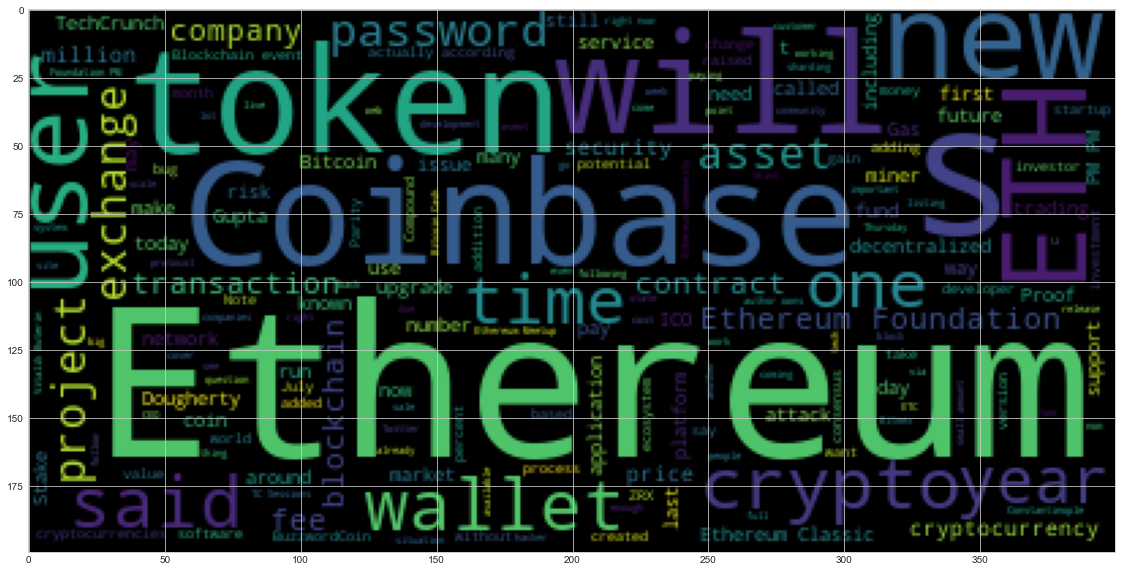

In [81]:
# Generate the Ethereum word cloud
wc = WordCloud().generate(eth_df.text.str.cat())
plt.imshow(wc)

# Named Entity Recognition

In this section, you will build a named entity recognition model for both coins and visualize the tags using SpaCy.

In [83]:
import spacy
from spacy import displacy

In [84]:
# Optional - download a language model for SpaCy
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
2021-03-12 12:57:20.329386: W tensorflow/stream_executor/platform/default/dso_loader.cc:60] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2021-03-12 12:57:20.329767: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [85]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

## Bitcoin NER

In [87]:
# Concatenate all of the bitcoin text together
btc_cat =btc_df.text.str.cat()

AttributeError: 'generator' object has no attribute 'text'

In [89]:
# Run the NER processor on all of the text
doc=nlp(btc_cat)
doc
# Add a title to the document
doc.user_data["title"]="Bitcoin NER"
doc.user_data

NameError: name 'btc_cat' is not defined

In [ ]:
# Render the visualization
displacy.render(doc,jupyter=True, style="ent")

In [90]:
# List all Entities
for entity in doc.ents:
    print (entity.text,entity.label_)

NameError: name 'doc' is not defined

---

## Ethereum NER

In [92]:
# Concatenate all of the bitcoin text together
eth_cat =eth_df.text.str.cat()

In [93]:
# Run the NER processor on all of the text
docs=nlp(eth_cat)
docs
# Add a title to the document
docs.user_data["title"]="Ethereum NER"
docs.user_data

{'title': 'Ethereum NER'}

In [94]:
# Render the visualization
displacy.render(docs,jupyter=True, style="ent")

In [95]:
# List all Entities
for entity in docs.ents:
    print (entity.text,entity.label_)

three months DATE
$50 million MONEY
Consensys Ventures ORG
Ethereum PERSON
Joe Lubin’s PERSON
Consensys Systems ORG
first ORDINAL
four CARDINAL
Ethereum ORG
Ethereum Ventures ORG
Kavita Gupta PERSON
Gupta’s ORG
first ORDINAL
Gupta GPE
BlockFi ORG
Zac Prince PERSON
Cognical ORG
Kavita Gupta PERSON
Consensys Ventures ORG
Microsoft Bing Ventures ORG
Rahul Sood PERSON
Unikrn ORG
MarK Cuban PERSON
$25 million MONEY
September DATE
Unikrn ORG
these days DATE
Gupta PERSON
over $100 million MONEY
a few months ago DATE
$20 million MONEY
$10 million MONEY
$5 million MONEY
Gupta PERSON
FOMO ORG
Gupta PERSON
Gupta PERSON
Unikrn ORG
Pryze PERSON
BlockFi ORG
Consensys Ventures ORG
Consensys ORG
Gupta PERSON
Consensys ORG
six-month DATE
Gupta PERSON
every day DATE
Six months DATE
five years DATE
Ethereum ORG
just four CARDINAL
Coinbase NORP
Ethereum Classic PERSON
ETC ORG
Ethereum ORG
the coming months DATE
Ethereum Classic PERSON
July 2016 DATE
DAO ORG
the Ethereum Foundation ORG
Ethereum ORG
Ethereu